![title](tv.png)

## 📚 Importing Libraries 📚

In [72]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

## ⏳ Exploring Dataset ⏳

In [3]:
df = pd.DataFrame(pd.read_csv("advertising.csv"))
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 🧠 Understanding Data 🧠

In [6]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [34]:
df.describe(include='all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [35]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## 🧹 Data Cleaning 🧹

In [8]:
df.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [36]:
df.duplicated().sum()

0

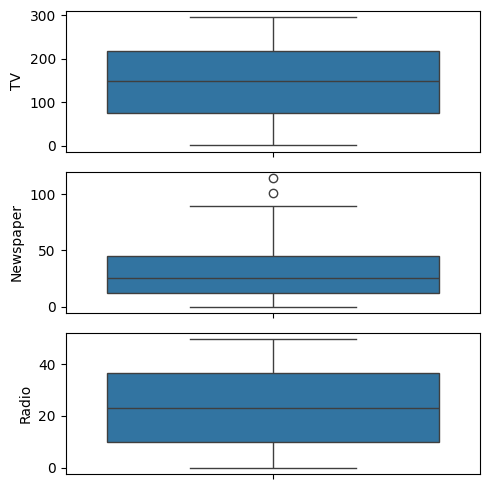

In [9]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

#  📊 Data Visualization 📊

### Univariate Analysis

#### ** Sales ** 

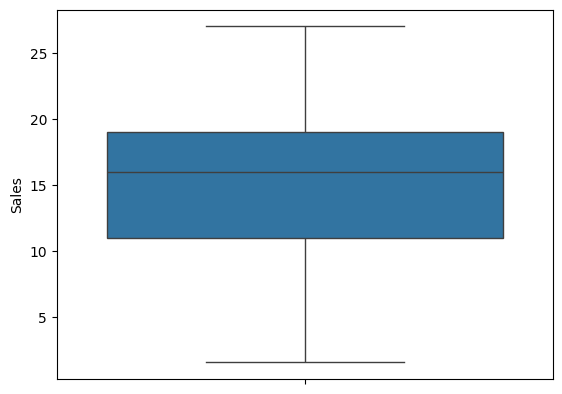

In [10]:
sns.boxplot(advertising['Sales'])
plt.show()

### ** TV ** 

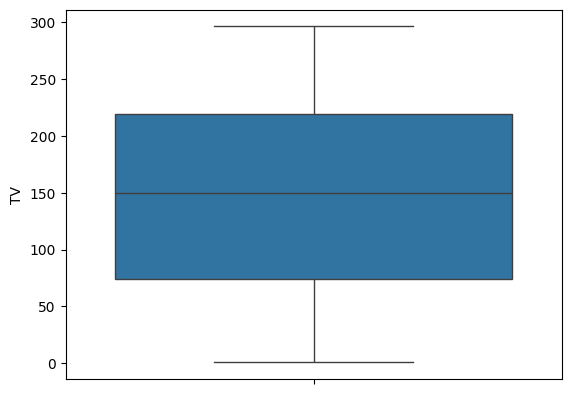

In [37]:
sns.boxplot(advertising['TV'])
plt.show()

### ** Radio ** 

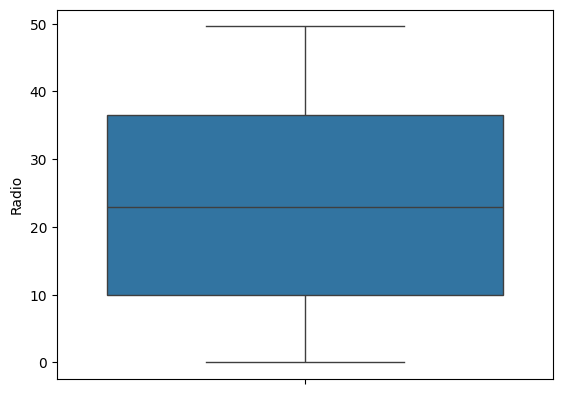

In [38]:
sns.boxplot(advertising['Radio'])
plt.show()

### ** Newspaper **

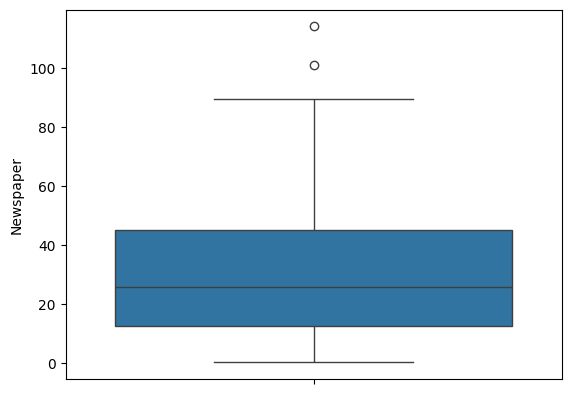

In [39]:
sns.boxplot(advertising['Newspaper'])
plt.show()

## Bivariate Analysis

### visulize Sales with other variables

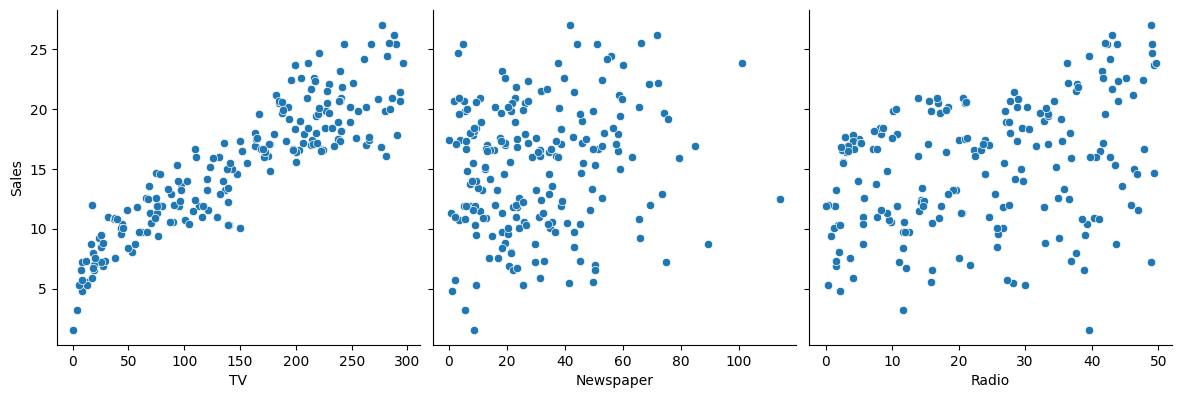

In [11]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

## ⚙️ Data Preprocessing ⚙️

In Data Preprocessing, we will perorm:

1. Check for outliers
2. Check correlation
3. Split data in train and test
4. Apply standard scalingma_,maxima_)

In [40]:
df_new = df.copy(deep = True)

In [41]:
def outliers_box(d_f, col_):
    try:
        q1 = np.quantile(d_f[col_], 0.25)
        q2 = np.quantile(d_f[col_], 0.75)
        iqr = q2 - q1
        maxima_ = q2 + 1.5 * iqr
        minima_ = q1 - 1.5 * iqr

        if (d_f[col_].max() > maxima_) or (d_f[col_].min() < minima_):
            print(col_, '------- outliers present')
        else:
            print(col_, '------- outliers not present')

        return minima_, maxima_
    except Exception as e:
        print(f"Error in outliers_box for column {col_}: {e}")
        return None

In [42]:
def out_remove(d_f, col_):
    x1, y1 = outliers_box(d_f, col_)
    # Créer une copie du DataFrame
    df_copy = d_f.copy()
    # Supprimer les lignes contenant des outliers
    df_copy.drop(index=df_copy[(df_copy[col_] < x1) | (df_copy[col_] > y1)].index, axis=0, inplace=True)
    return df_copy

In [43]:
for i in df_new.columns:
    # Convertir la colonne en type numérique
    df_new[i] = pd.to_numeric(df_new[i], errors='coerce')
    # Vérifier et supprimer les outliers
    df_new = out_remove(df_new, i)
    df_new.reset_index(drop=True, inplace=True)

TV ------- outliers not present
Radio ------- outliers not present
Newspaper ------- outliers present
Sales ------- outliers not present


In [44]:
df.shape

(200, 4)

In [45]:
df_new.shape

(198, 4)

In [46]:
df_new.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.899974
Radio,0.051978,1.000000,0.346364,0.348566
Newspaper,0.049771,0.346364,1.000000,0.151764
Sales,0.899974,0.348566,0.151764,1.000000


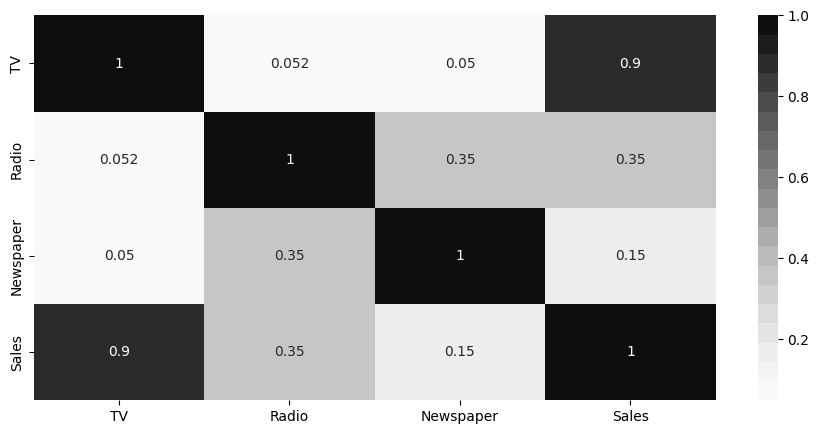

In [48]:
gray_palette = sns.color_palette('Greys', n_colors=20)
plt.figure(figsize=(11, 5))
sns.heatmap(df_new.corr(), annot=True, cmap=gray_palette)
plt.show()

## ✍🏻 PREPARE THE DATA FOR ALGORITHMES ✍🏻

In [60]:
X = df_new['TV']
y = df_new['Sales']

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=42)

In [62]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [63]:
lr.params

const    7.147162
TV       0.054160
dtype: float64

In [64]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     514.7
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           4.54e-48
Time:                        14:06:27   Log-Likelihood:                -315.07
No. Observations:                 138   AIC:                             634.1
Df Residuals:                     136   BIC:                             640.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1472      0.414     17.271      0.0

#####  Looking at some key statistics from the summary

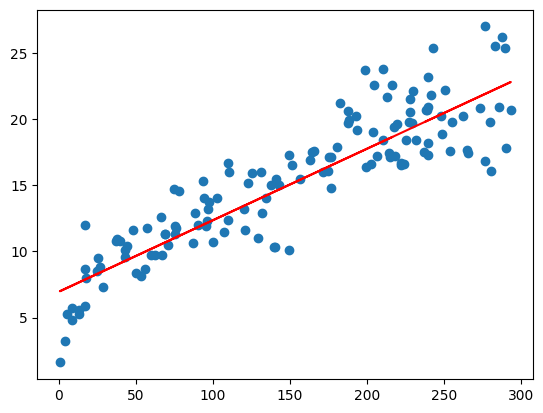

In [65]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Model Evaluation

In [66]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

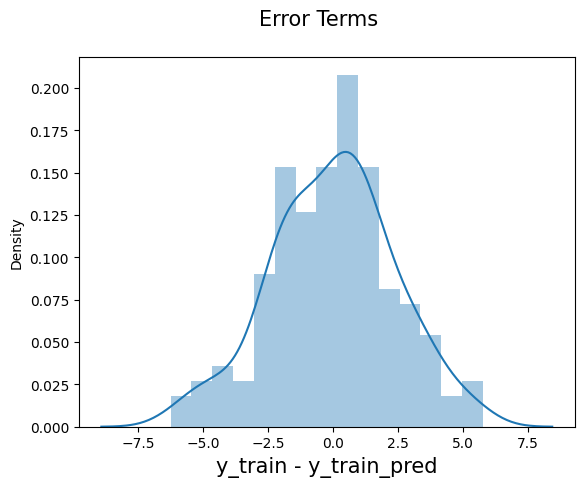

In [67]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                
plt.xlabel('y_train - y_train_pred', fontsize = 15)        
plt.show()

##### Looking for patterns in the residuals

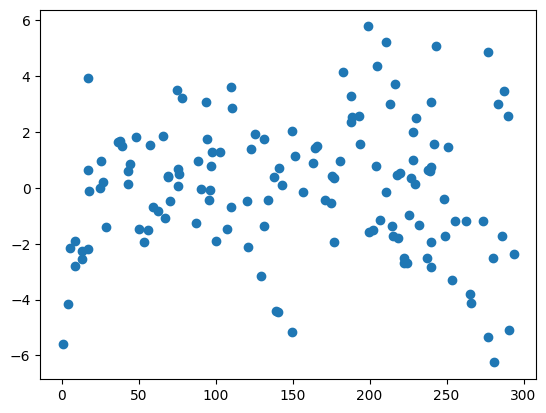

In [68]:
plt.scatter(X_train,res)
plt.show()

#### Predictions on the Test Set

In [69]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [70]:
y_pred.head()

65      8.853216
114    14.686296
16     22.387911
141    12.812344
156     7.780839
dtype: float64

##### the RMSE

In [73]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.104717258955991

###### Checking the R-squared on the test set

In [74]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8466543175465431

##### Visualizing the fit on the test set

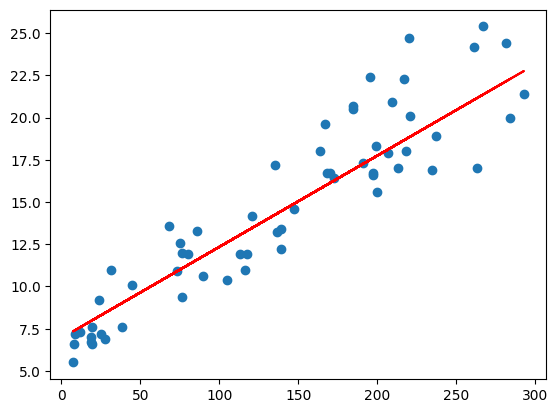

In [75]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

![title](end1.jpg)